# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [24]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [25]:
# TODO: Minimum price of the data
minimum_price = np.amin(prices)

# TODO: Maximum price of the data
maximum_price = np.amax(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: **

1. A hourse with more rooms should be worth more that the one with lesser number of rooms. Increase in this feature's value will increase the value of the house ('MEDV').

Higher RT value => More MEDV value

2. Higher percentage of low-income owners will be the reverse of the phenomenon of 'gentrification' - where higher-income or rich families move to lower income neighborhoods - effectively increasing the monatory value of the houses - Therefore, the higher value of low-income ownership should keep the prices stable and low. 

Higher LSTAT value => lower MEDV value.

3. A higher PTRATIO means fewer teachers teaching to more kids - The higher this ration, the lower the demand for houses in that neighborbood, essentially lowering the value of the houses in that neighbourhood. 

Higher PTRATIO value => lower MEDV value.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [4]:
from sklearn.metrics import r2_score
    
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [5]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**

An r2_score of 0.923 means that more than 92% of variance in dependent variable Y can be predicted from independent variable X. I will definitely consider this model to have successfully capture the variance in the targer variable

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.model_selection` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [6]:
from sklearn.model_selection import train_test_split

housing = pd.read_csv('housing.csv')
housing
# slice off all columns from start to 'PTRATION' -- defines our 'features' - see panda's loc indexing below
features = housing.loc[:, :'PTRATIO']

# slice off all columns from start to 'PTRATION' -- defines our 'features'
prices = housing['MEDV']

X_train, X_test, y_train, y_test = train_test_split(features, prices, train_size=0.80, random_state=10)
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **

Splitting data into training and testing subsets in a reasonable ratio is key to coming up with a good model that predicts correctly. The idea is to draw a general pattern from the data while 


1). Minimizing the error and 
2). Not memorizing the data.

1 above is acheived when the traing and testing samples are not just a few values - or very low compared to the actual data that may be huge. If you have billions or actual records out there in the field, but you trained (and tested) your model on a few hundreds - the error will be huge - This is called underfitting.

on the contrary, you do not want to keep the training (and the respective testing) data to be too much either of the potential possible data out there - suppose the actual data was in billians of records, and you trained your model by provding half of that for training, your actually are making your model remmeber the decisions - this is not helping with a good prediction either - this is called overfitting.

So the benefit of picking only a 'reasonable' portion of the data for training and testing is that we can tell our model what the general pattern may be. Thats all. Once a pattern is found out, traning on more data is actually harmful - a model that assumes too much about the data has actually memorized the decisions and will do very bad on prediction



----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

c:\users\ikram\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ikram\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ikram\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ikram\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\ikram\appdata\local\programs\python\python37\lib\site-p

C:\Users\ikram\dev\machine-learning-nanodegree\learn\boston_housing\visuals.py:68: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


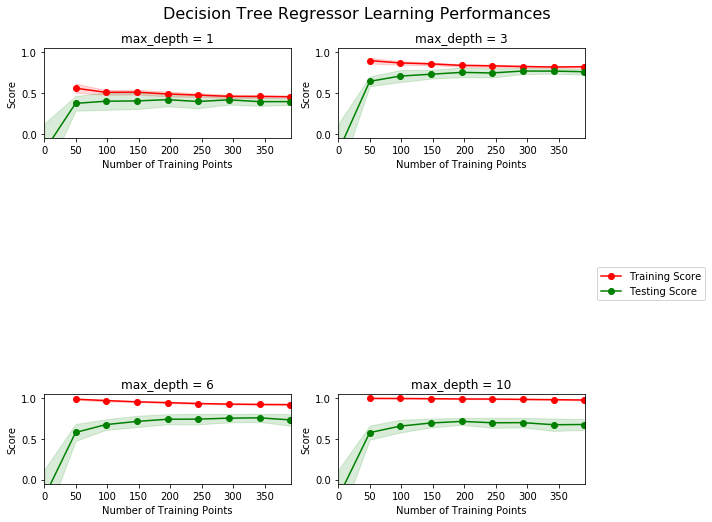

In [26]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **

1) max_depth=1: The first graph with max_depth=1 is too simple - it is not sophisticated enough to predict. Also, see scoring value is around .5 - that is not a good threshold value. Though the graph merge, but not a a good threshold value of score.


2). max_depth = 3: Lets discuss the graph with max_depth=3. Looks just-right. The training and learnig curves are converging at the sample size of 200 and above with a score of around 0.7. That should be a good threashold for our model.

As more sample points are added, the scores only increase for a certain size - but then remains almost constant at its almost-fixed value (for each max_depth) for all the sample points upcoming.

The idea is to make sure the train and test curves merge on a score value above a certain benchmark threshold. (Of course it should be more than 0.5 - because we learned above that the score for the coefficient of determination of value 0.5 is as bad as a score of 0 - that is a model that ALWAYS predicts the mean is as bad as a model that ALWAYS predicts wrong). Once our merging has happened above a reasoable threashold value, we do not really need to continue training the model more on the bigger training points. There shouldn't be any issue with training the data on bigger samples (except that the training will take more time). But it may be unnecessary beyond a certain point.

3). max_depth = 6: Though the scores for both the graphs are good and beyond a good scoring threshold, but overfitting can still be seen as the graphs do not merge.

4). max_Depth = 10: With max_depth = 10, the overfitting is even more - the training score is good, but this model will not preidct well either because it is elevating from the truth / validation at all the sample points.

Therefore, the 2nd option of max_depth=3 seems to be just the right model.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

** Run the code cell below and use this graph to answer the following two questions Q5 and Q6. **

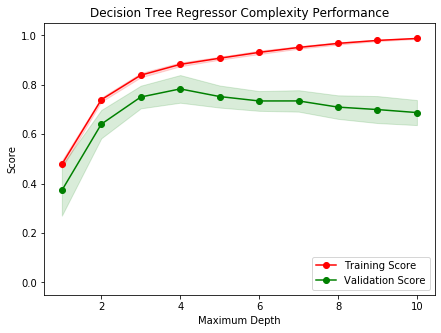

In [27]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: **

When the model is trained on max_depth of 1, it suffers from high bias - not high variance. We are giving not enough chance to all the dependent variables to contribute their shared variance to the prediction - This is underfitting.

With a max_depth of 10, the algorithm for traing makes the model too much complex that it cannot generlized the prediction well. As you can see in the graph above, beyond depth 5, the gap between the training and validation scores widen. Thats a good visual clue that overfitting is happening. Overfitting does good on trainging data - but predicts mostly bad values due to not having a generalized view of the model.

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **

Models with max_depth values of 3, 4 and 5 are in a competition here with an decreasing level of 'assumption' on the data in that order. Anything under 3 will be suffering from underfitting - any model trained on max_depth more than 5 is suffering from overfitting. 

So which one between the 3? While 3 may be making too much assumption on the data, 5 still seems to more inclined towards overfitting with declining validation scores. So 5 also is not a good choice. 4 seems to be the closest in terms of competition - will 3 makes lesser assumptions than 4 (may be a good idea to pick 3 from that perspective), but for is where the predictions and the actual are closest. So I will pick the model with max_depth=4.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **

Machine learning can basically be summerized in the following steps.
1. Divided your data into train, validation and test subsets
2. Pick a bunch of models and train them with training data
3. Assign each model a score - like F1 Score - and pick the model with best (highest) score.
4. Test and validate the model with test data to make sure its 'good'.

Step 3 above may present challenges when computing the F1 scores of a model that takes more than 1 'hyper' parameters. Like in SVM, we have a param called kernel and one called gamma - how will we decide which model to has the highest score? 

Thats where the Grid seaerch techniques chimes in. The way to use Grid search to optimize a leanring algorithm is as follows.

We simply list in a grid fashion the F1 values for all models that intersection on the two values from column and row. For example. See below table. 

			 --------------------------------------------------------------------
			|    \ kernal |        Linear         |         Polynomial           |  
			|gamma\ 	  | 					  |                              |
			|------\-------------------------------------------------------------
			|             |						  |                              |
			|   0.1       |    <a nice graph>     |       <a nice graph>         |  
			|	          |    F1 score = .5      |          F1 Score .2         |  
			|--------------------------------------------------------------------
			|             |                       |                              |  
			|   1         |     <a nice graph>    |      <a nice graph>          |       
			|	          |     F1 score = .8     |       F1 score = .4          |
			|--------------------------------------------------------------------
			|             |                       |                              |  
			|   10        |     <a nice graph>    |      <a nice graph>          |       
			|	          |     F1 score = .5     |       F1 score = .5          |  
 			 --------------------------------------------------------------------

Here, we pick the kernal value of linear and a gamma score of 1 because they give the highest values of .8 on the score.

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **

Data is previous when it comes to training (and testing) - as our golden rule tell us we can never use the test data for training, this leaves us with a smaller precentage of training data which mostly results in overfitted models. To avoid this, we divide the data into k buckets and train the model k times each time treaing one of the k buckets as training data and the rest k-1 as the training data. This helps the model NOT hold too many assumptions of the data due to the switch of the test 'test' bucket in each training.

Relating to Grid search, k-fold validation may be used to find the best estimator when we set this technique as a scorer object passed in to GridSeachCSV constructor - then we get the best classifer from the grid fit as below.

best_clf = grid_fit.best_estimator_


### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, you will find your implementation is using `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique you describe in **Question 8**, this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. While you're working on your implementation, think about the contrasts and similarities it has to the K-fold cross-validation technique.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.20/modules/generated/sklearn.model_selection.GridSearchCV.html) from `sklearn.model_selection` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [28]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [29]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: **

Parameter 'max_depth' is 4 for the optimal model.

As guessed (by looking at the learning curves) when answering Question 6, max_depth value of 4 DOES seem to be the right choice as returned by our fit_model() function. 

Me Happy !!!

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

Run the code block below to have your optimized model make predictions for each client's home.

Predicted selling price for Client 1's home: $406,933.33
Predicted selling price for Client 2's home: $232,200.00
Predicted selling price for Client 3's home: $938,053.85


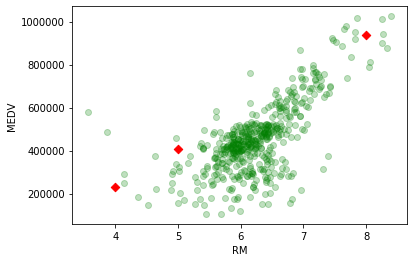

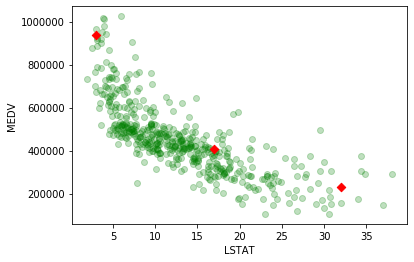

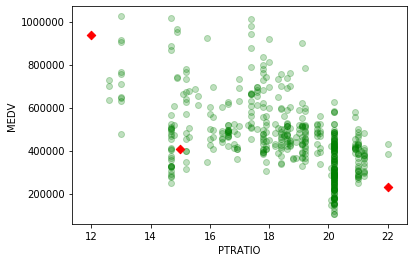

In [30]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

prediction_data = np.transpose(client_data)
pred = reg.predict(client_data)

# Must be entered in the same sequence as the features in client_data are entered - a reminder to self.
house_features = ['RM', 'LSTAT','PTRATIO'] 

import matplotlib.pyplot as plt
for i, f in enumerate(house_features):
    plt.scatter(features[f], prices,alpha=0.25, c='green')
    plt.scatter(prediction_data[i], pred, color='red', marker='D')
    plt.xlabel(f)
    plt.ylabel('MEDV')
    plt.show()

**Answer: **

Observations: Without running the code snippet above, we can (intuitively) tell that client 3's home will be the most expensive (great schools, only 3% of the population is considered working class or 'poor', and there are 8 rooms in the house) Client 1's home should be 2nd most expensive, client 2's the cheapest for the same reasons.

Actually, if we see the total scores of the directly-propotional attributes (rooms and poor population percentage values) and assign decreasing scores of the inversely proportional one (teach to student ratio) and them linearly - may be we can tell a story right there why the order of values decreses in client 3, client 1 and client 2 order

Student: Teacher ratio scoring
Students (1 to 10): 1 teacher --> 100
Students (11 to 15): 1 teacher --> 80
Students (16 to 20): 1 teacher --> 70
Students (21 to 25): 1 teacher --> 60
Students (26+): 1 teacher --> 50


Client 3's score - 8 + 3 + 100 = 111
Client 2's score - 4 + 32 + 60 = 96
Client 1's score - 5 + 17 + 80 = 102

As we can see, the weights we found out for the TOTAL (though linear, but still telling alot) - are evidently telling us which home must be more expensive than the other. We may actually - these are all linearly weighed - but we can have coeffients that will assign weights to each value like.

t = w1.x + w2.y + w3.z

These weights can then be adjusted based on where on a training data points appear - infact, this is exactly what Linear Regression does internally (looks like we will be doing a deeper dive in next section on that).

Going a bit further, we can actually draw the graph against each feature (plz see above) - following is my read on the data and predictions

The graphs tell us that the RM and LSTAT value do fill in (an almost) linear pattern - increase the number of rooms, the prices go hight linearly - increase the value of LSTAT (more working class), prices drop. Our pridicted values (in red) pass well-enough through the middle of the galaxy - giving us a good generalzation there (however, I guess on the RM graph, it would have been better that for the two houses with 4 and 5 five rooms, we had predicted lower values than those - thats where most of the green dots are going).

However, the increaes in students to teachers ratio is not telling a very good story there - the graph isn't farming a good pattern. Our three predicted dots are realy passing through the heard of the galaxy - may be the 2nd red line should have fallen on a straight(er) line beween 1 and 3? Yea, that would have been a better prediction.

But he PTRATIO graph itself isn't farming as sharp a pattern as RM and LSTAT are - This may be telling that the ratio of teacher to student may not really be a good parameter - (at least not as good as RM and LSTAT) - Better school rating (like how the sdudent's did on state exams, what is the college acceptance ratio, students sports performance etc) would have been better values than just the plan ratio. Neighborhoods that have better schools, tend to attract more population anyways - the ratio may actually tend to increase anyways (well, if the neighborhood has apartments rather than just homes, this phenomenon may be more evident in those neighborhoods).

Anyways - above is my read of the data and plots above.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [31]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Hint:** Take a look at the range in prices as calculated in the code snippet above. Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

**Answer: **

Inflation plays a vital role in setting up the prices of the houses in any country. The data was multiplicativey skewed to adjusted to the inflation that has happened since 1978 (was mentioned in the start of section). 

While schools, social economical status and size contribute the most to the value of a house, only these three features aren't enough to describe a home  - in today's world, there are other social and politica reasons most buyer weigh in towards their buying decisions. Easy commute to bigger metropolicis, ethinicty and changing global weather conditions (houses near sea-shores may not be so attractive for buyers with increasing number of floodings) can be few of the other factors that define home values. So while the models trained on those 3 attributes may give a rough idea of the preidction, they cannot be very accurate. 

Pool, car parking, backyard, car-dependency, utility provision (public vs private sewer etc) are few other paramters that play crucial roles in the value of a home.

Also, data collected for Boston, cannot be applicable to rural areas. For example, the number of rooms in urban areas may not be a good choice - may be including the developed and undeveloped footage of the house area will be a better parameter for urban areas where people tend to have farm lands and tend to go for bigger sizes of houses even though the number of rooms may be less. Also, the teacher to student ratio may not vary alot in urban areas - that also may not be a good choice of parameters.

It is fair to judge the price of a home based on the characteristic of the neighborhood sure - A home is not just where you go to sleep - home is where you socialize in your neighborhood - have contacts with people around you and above all where you feel secure. A huge beautiful house in a great school disctrict may not (and should not) a great value if the security situation of the neighbourhood is not good.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.